In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def display_image(image):
    plt.imshow(image, cmap="gray")
    plt.show()

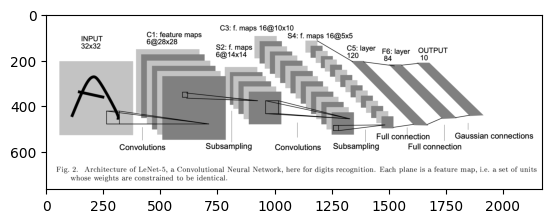

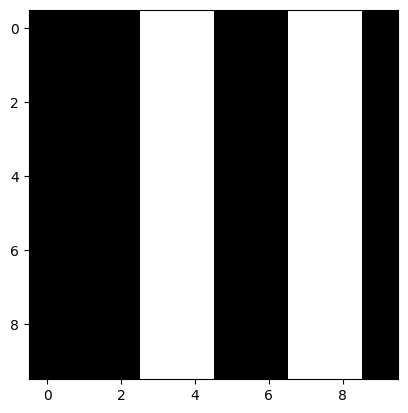

In [24]:
image = cv2.imread('images/image1.png', 0)
display_image(image)

image2 = np.zeros((10, 10), dtype=np.uint8)
image2[:, 3:5] = 255
image2[:, 7:9] = 255
display_image(image2)

(764, 2172)


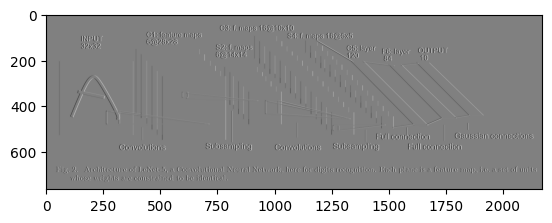

In [45]:
class Conv2D():
    def __init__(self, depth, num_filters, ksize):
        self.depth = depth 
        self.num_filters = num_filters
        self.ksize = ksize
        self.filters = np.array([[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]], dtype=np.int32)

    def forward(self, inputs):
        """input: CxWxH, output: DxWxH"""
        h, w = inputs.shape
        feature_map = np.zeros(inputs.shape, dtype=np.float32)

        for r in range(1, h - 1):
            for c in range(1, w - 1):
                conv_val = 0
                idx = self.ksize // 2
                for i in range(-idx, idx + 1):
                    for j in range(-idx, idx + 1):
                        conv_val += inputs[r + i][c + j] * self.filters[i + idx][j + idx]

                feature_map[r][c] = conv_val
        
        return feature_map

conv2d = Conv2D(depth=1, num_filters=10, ksize=3)
output = conv2d.forward(image)
print(output.shape)
display_image(output)